In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
import keras
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
input_shape_2D=(224,224) # here i'm fixeing the image shape in 2D
input_shape_3D= (224,224,3) # here i'm fixeing the image shape in 2D
seed=1    # assign seed
batch_size=32  #assigning batch size
epochs=30    # assign epochs

In [12]:
data_ds= tf.keras.utils.image_dataset_from_directory(
    directory=r'/content/drive/MyDrive/train',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=None,
    image_size=input_shape_2D,
    seed=seed
)

Found 104 files belonging to 2 classes.


In [13]:
#class labels
class_names = data_ds.class_names

print("Class Names:", class_names)

Class Names: ['glasses', 'noglasses']


In [14]:
# here i'm defining the image and label of all image and change their image type and get all image from 3 classes

def show_images(images, labels):
    fig, axes = plt.subplots(8, 4, figsize=(10, 10))
    axes = axes.flatten()
    for i, (img, label) in enumerate(zip(images, labels)):
        axes[i].imshow(img.numpy().astype("uint8"))
        axes[i].set_title(f"Label: {label}")
        axes[i].axis("off")
    plt.tight_layout()
    plt.show()

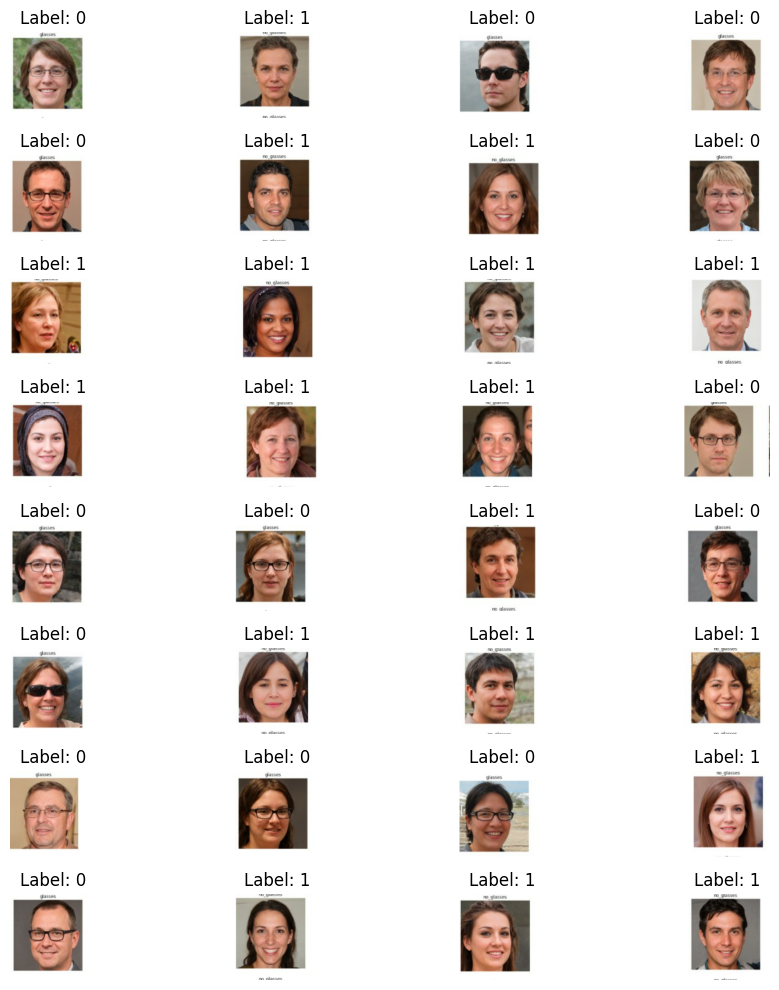

In [17]:
#displaying image batch of 32
batched_ds = data_ds.batch(batch_size)

batch = next(iter(batched_ds))
images, labels = batch

images, labels = next(iter(batched_ds))
show_images(images, labels)

In [18]:
X=[] # creating the empty list
y= [] # creating the empty list

for image, labels in data_ds.batch(120):  # running loop for getting all image and labels of data
  for img, labels in zip(image, labels):   # ruuning loop
    X.append(img)   # appending image in X
    y.append(labels.numpy())  # appending labels in y

In [19]:
print(image.shape)  # shape of image


(104, 224, 224, 3)


In [20]:
# converting to numpy array
X= np.array(X)
y= np.array(y)

In [25]:
#breaking training set into training and validation sets manually
(X_train,X_test) = X[0:80],X[80:]
(y_train,y_test) = y[0:80],y[80:]

In [26]:
# getting X_train,X_test,y_train,y_test shape

print("shape of X_train_scaled:", X_train.shape)
print("shape of y_train:", y_train.shape)
print("shape of X_test_scaled:", X_test.shape)
print("shape of y_test:", y_test.shape)

shape of X_train_scaled: (80, 224, 224, 3)
shape of y_train: (80,)
shape of X_test_scaled: (24, 224, 224, 3)
shape of y_test: (24,)


In [27]:
# reshaping the image size

X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [28]:
 # encoding all image of y_train and y_test
from tensorflow.keras import utils
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=len(class_names))
y_test = to_categorical(y_test, num_classes=len(class_names))

In [29]:
# print number of training,testing and validation images
print(X_train.shape[0],"train sample")
print(X_test.shape[0],"test sample")

80 train sample
24 test sample


In [35]:
# creating CNN Architecture


from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout


model = Sequential()
model.add(Conv2D(filters=16,kernel_size=(3,3),padding='same',strides=(1),activation='relu',use_bias=False,kernel_initializer='glorot_uniform',bias_initializer='zeros',input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=3))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',strides=(1),activation='relu',use_bias=False,kernel_initializer='glorot_uniform',bias_initializer='zeros'))
model.add(MaxPooling2D(pool_size=3))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',strides=(1),activation='relu',use_bias=False,kernel_initializer='glorot_uniform',bias_initializer='zeros'))
model.add(MaxPooling2D(pool_size=3))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',strides=(1),activation='relu',use_bias=False,kernel_initializer='glorot_uniform',bias_initializer='zeros'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=256,kernel_size=(3,3),padding='same',strides=(1),activation='relu',use_bias=False,kernel_initializer='glorot_uniform',bias_initializer='zeros'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(250,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(2,activation='softmax'))


model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 224, 224, 16)        │             432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 74, 74, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 74, 74, 32)          │           4,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 24, 24, 64)          │          18,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 8, 8, 128)           │          73,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 256)           │         294,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 250)                 │         256,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │          25,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             202 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 673,664 (2.57 MB)

 Trainable params: 673,664 (2.57 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
# assigning optimizer,loss and accuracy what we want
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [37]:
from keras.callbacks import ModelCheckpoint # we are assigning the checkpointer for save the model with val_accuracy
checkpointer = ModelCheckpoint(filepath = "/content/drive/MyDrive/train/model.weights.best.keras",save_best_only=True,mode=max,monitor='val_loss')

<ipython-input-37-08d286728e00>:2: UserWarning: ModelCheckpoint mode '<built-in function max>' is unknown, fallback to auto mode.
  checkpointer = ModelCheckpoint(filepath = "/content/drive/MyDrive/train/model.weights.best.keras",save_best_only=True,mode=max,monitor='val_loss')


In [38]:
epoch = 63 # assigning epochs and fitting the model with some parameters
history = model.fit(X_train,y_train,batch_size=32,epochs=epoch,validation_data=(X_test,y_test),callbacks=[checkpointer],
              verbose=1,shuffle=True)

Epoch 1/63
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.4563 - loss: 0.6962 - val_accuracy: 0.4583 - val_loss: 0.6941
Epoch 2/63
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.4945 - loss: 0.6932 - val_accuracy: 0.4583 - val_loss: 0.6953
Epoch 3/63
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 865ms/step - accuracy: 0.5078 - loss: 0.6916 - val_accuracy: 0.4583 - val_loss: 0.6940
Epoch 4/63
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 915ms/step - accuracy: 0.5219 - loss: 0.6831 - val_accuracy: 0.4583 - val_loss: 0.6859
Epoch 5/63
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 868ms/step - accuracy: 0.5805 - loss: 0.6805 - val_accuracy: 0.7500 - val_loss: 0.6687
Epoch 6/63
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 911ms/step - accuracy: 0.6898 - loss: 0.6550 - val_accuracy: 0.8333 - val_loss: 0.6322
Epoch 7/63
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.7664 - loss: 0.6125 - val_accuracy: 0.8750 - val_loss: 0.5502
Epoch 8/63
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.8164 - loss: 0.4718 - val_accuracy: 0.8333 - val_loss: 0.4063
Epoc

In [39]:
# predicting the model and assigning in variable

y_hat = model.predict(X_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
leaf_class = ['glasses','non_glasses']

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 604ms/step


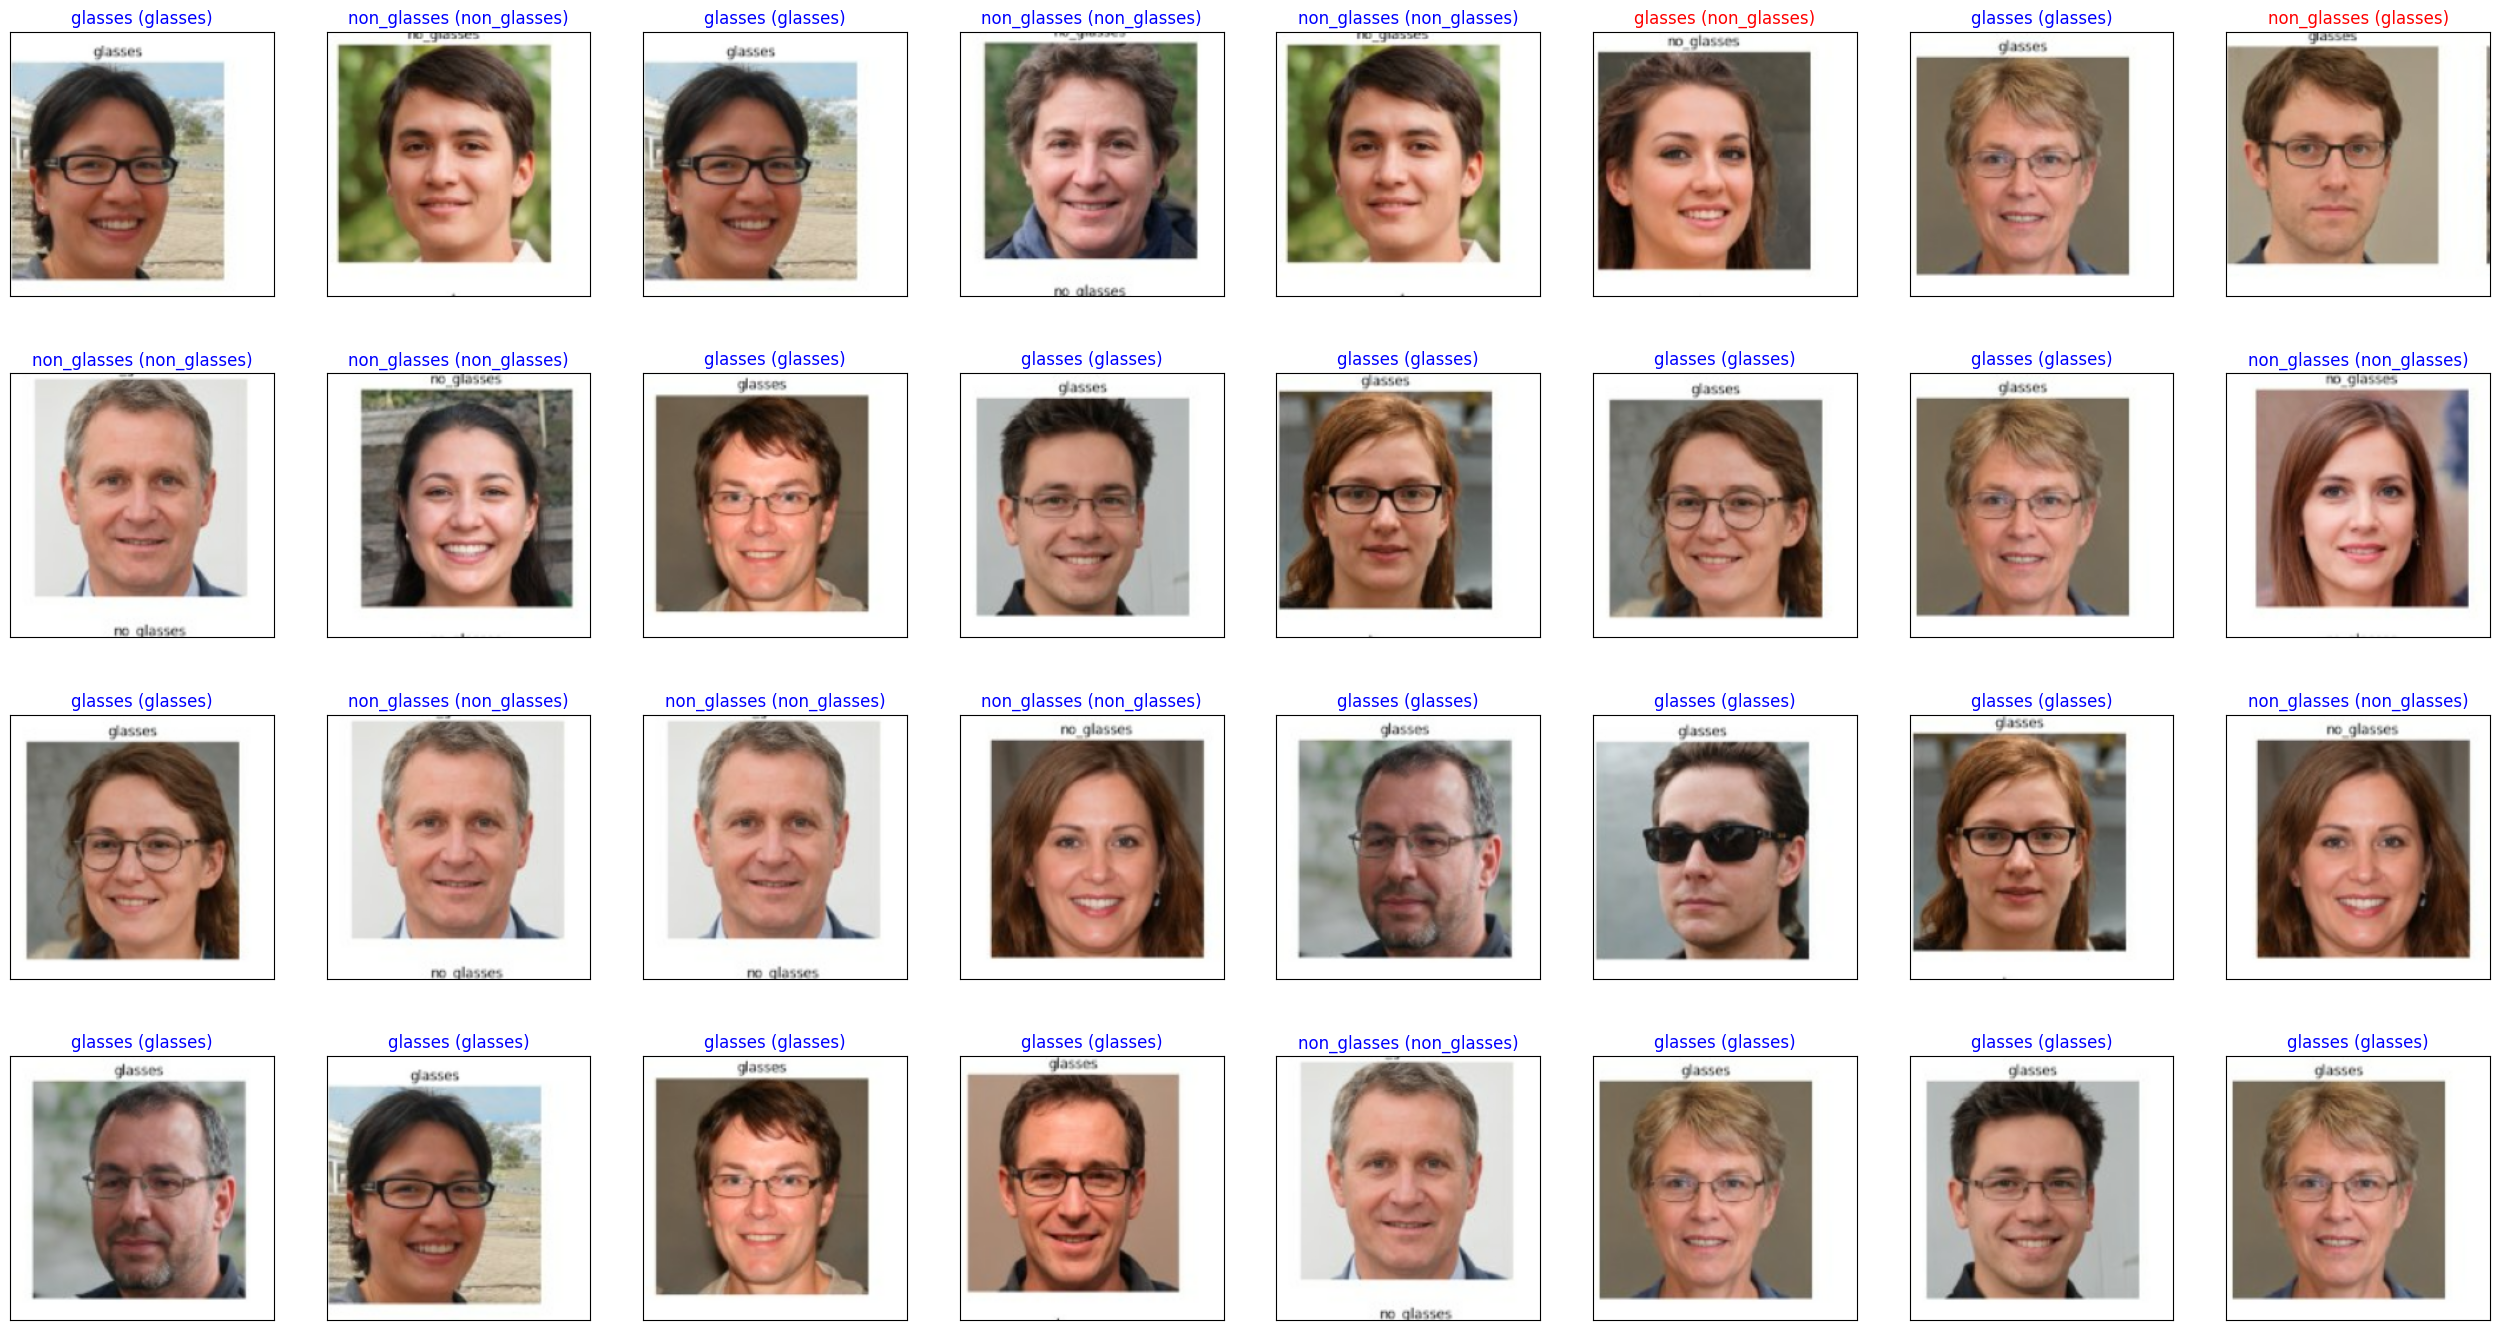

In [43]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(32, 17))
for i, idx in enumerate(np.random.choice(X_test.shape[0], size=32, replace=True)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[idx]))
    pred_idx = np.argmax(y_hat[idx]) 
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(leaf_class[pred_idx], leaf_class[true_idx]),
                 color=("blue" if pred_idx == true_idx else "red"))